In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
from google.colab import files
uploaded = files.upload()

Saving data_cleaned.csv to data_cleaned (1).csv


In [62]:
df = pd.read_csv('data_cleaned.csv')

In [63]:
df.head()

,Email,Kota,Tanggal Pembelian,Produk Yang Dibeli,Nomor Penjualan,Jumlah Pembelian,Rating,Jasa Pengiriman,Customer Baru,Sales Person,Nama Lengkap,Harga,Nama Barang,Total Harga
0,Satya@gmail.com,Bogor,2018-12-28,KP0425CB,36897,5,4.0,Wakanda Express,Y,Ll-409,Bambang Satya,27250000.0,Congo Blue Blend 25kg,136250000.0
1,Rachmat@icloudx.com,Banjar,2018-12-28,KP0925SG,35624,3,4.0,Wakanda Express,N,Do-409,Rachmat P,15000000.0,Sidikalang Gold Blend 25kg,45000000.0
2,LIE@ymail.com,Gorontalo,2018-12-26,KP0850FB,35745,7,4.0,JENT,Y,Bc-983,Lie Arsil,21000000.0,Flores Blend 50kg,147000000.0
3,Hardono@ymail.com,Purwokerto,2018-12-25,KP0750AJ,35432,9,4.0,Cepat Kirim,Y,Ng-410,Jimmy Hardono,18000000.0,Arabica Java 50kg,162000000.0
4,Hirawan@rocketmail.com,Pasuruan,2018-12-24,KP0925SG,35012,7,4.0,JENT,N,Ae-123,Sudjono Hirawan,15000000.0,Sidikalang Gold Blend 25kg,105000000.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Email               1061 non-null   object 
 1   Kota                1061 non-null   object 
 2   Tanggal Pembelian   1061 non-null   object 
 3   Produk Yang Dibeli  1061 non-null   object 
 4   Nomor Penjualan     1061 non-null   int64  
 5   Jumlah Pembelian    1061 non-null   int64  
 6   Rating              1061 non-null   float64
 7   Jasa Pengiriman     1061 non-null   object 
 8   Customer Baru       1061 non-null   object 
 9   Sales Person        1061 non-null   object 
 10  Nama Lengkap        1061 non-null   object 
 11  Harga               1061 non-null   float64
 12  Nama Barang         1061 non-null   object 
 13  Total Harga         1061 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 116.2+ KB


In [65]:
# Konversi kolom 'Tanggal Pembelian' ke dalam format datetime jika belum dalam format tersebut
df['Tanggal Pembelian'] = pd.to_datetime(df['Tanggal Pembelian'])

# Mengurutkan data berdasarkan kolom 'Tanggal Pembelian' secara menaik
data = df.sort_values(by='Tanggal Pembelian')

In [66]:
# Konversi kolom 'Tanggal Pembelian' ke tipe data datetime
data['Tanggal Pembelian'] = pd.to_datetime(data['Tanggal Pembelian'])

# Ekstrak tahun dan bulan dari kolom 'Tanggal Pembelian'
data['Tahun'] = data['Tanggal Pembelian'].dt.year
data['Bulan'] = data['Tanggal Pembelian'].dt.month

# Kelompokkan data berdasarkan tahun dan bulan, lalu hitung total pendapatan untuk setiap bulan
total_pendapatan_per_bulan = data.groupby(['Tahun', 'Bulan'])['Total Harga'].sum()

# Kelompokkan data berdasarkan tahun dan hitung total pendapatan untuk setiap tahun
total_pendapatan_per_tahun = data.groupby('Tahun')['Total Harga'].sum()


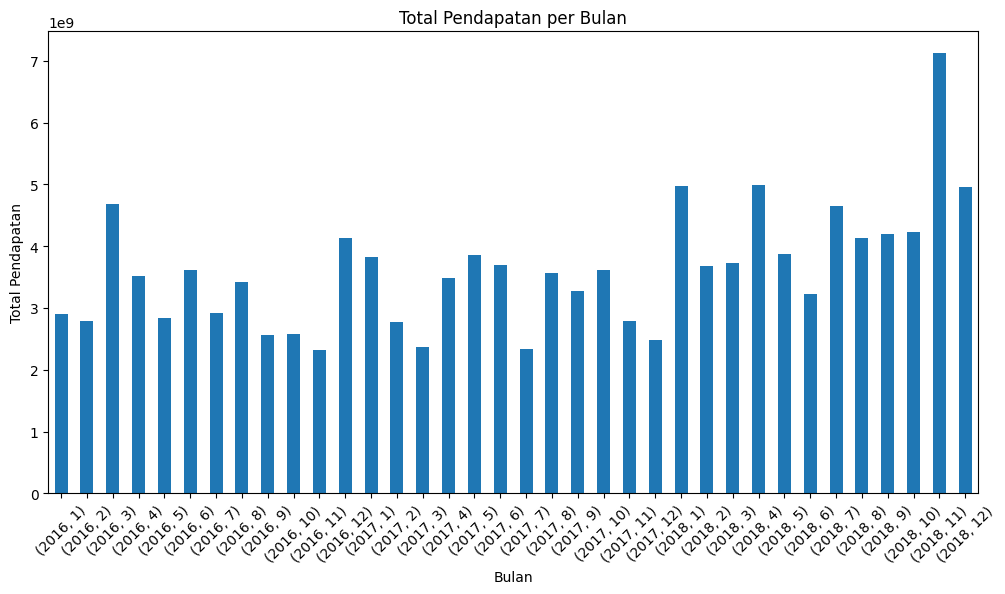

In [67]:
# Plot grafik bar
plt.figure(figsize=(12, 6))
total_pendapatan_per_bulan.plot(kind='bar')
plt.title('Total Pendapatan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Pendapatan')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Plot grafik bar
plt.figure(figsize=(12, 6))
total_pendapatan_per_tahun.plot(kind='bar')
plt.title('Total Pendapatan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Pendapatan')
plt.xticks(rotation=45)
plt.show()

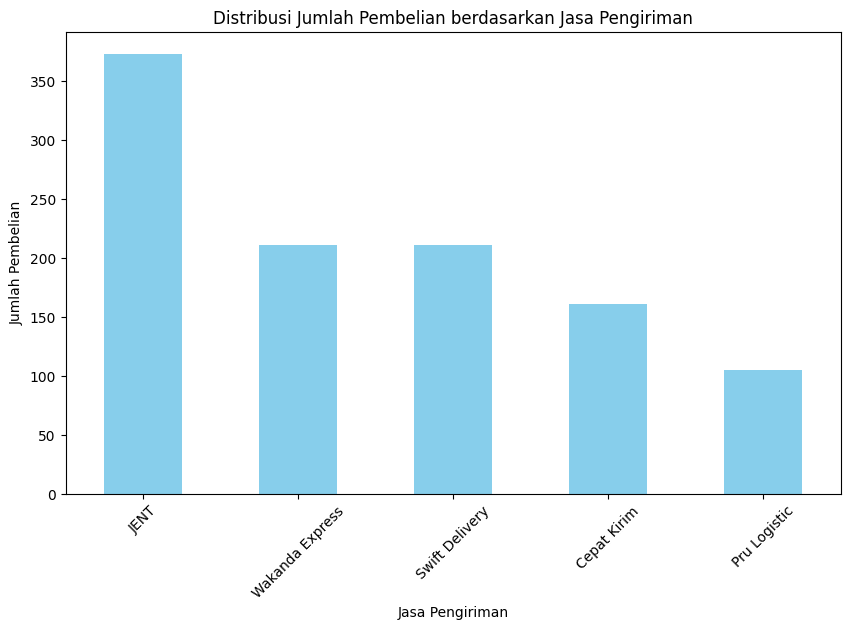

In [69]:
import matplotlib.pyplot as plt

# Hitung jumlah pembelian untuk setiap jenis jasa pengiriman
pengiriman_counts = data['Jasa Pengiriman'].value_counts()

# Plot grafik batang
plt.figure(figsize=(10, 6))
pengiriman_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Jumlah Pembelian berdasarkan Jasa Pengiriman')
plt.xlabel('Jasa Pengiriman')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.show()



In [70]:
pengiriman_sering_digunakan = data.groupby(['Kota', 'Jasa Pengiriman'])['Nomor Penjualan'].count().reset_index()


In [71]:
most_used_shipping = pengiriman_sering_digunakan.groupby('Kota').apply(lambda x: x[x['Nomor Penjualan'] == x['Nomor Penjualan'].max()])


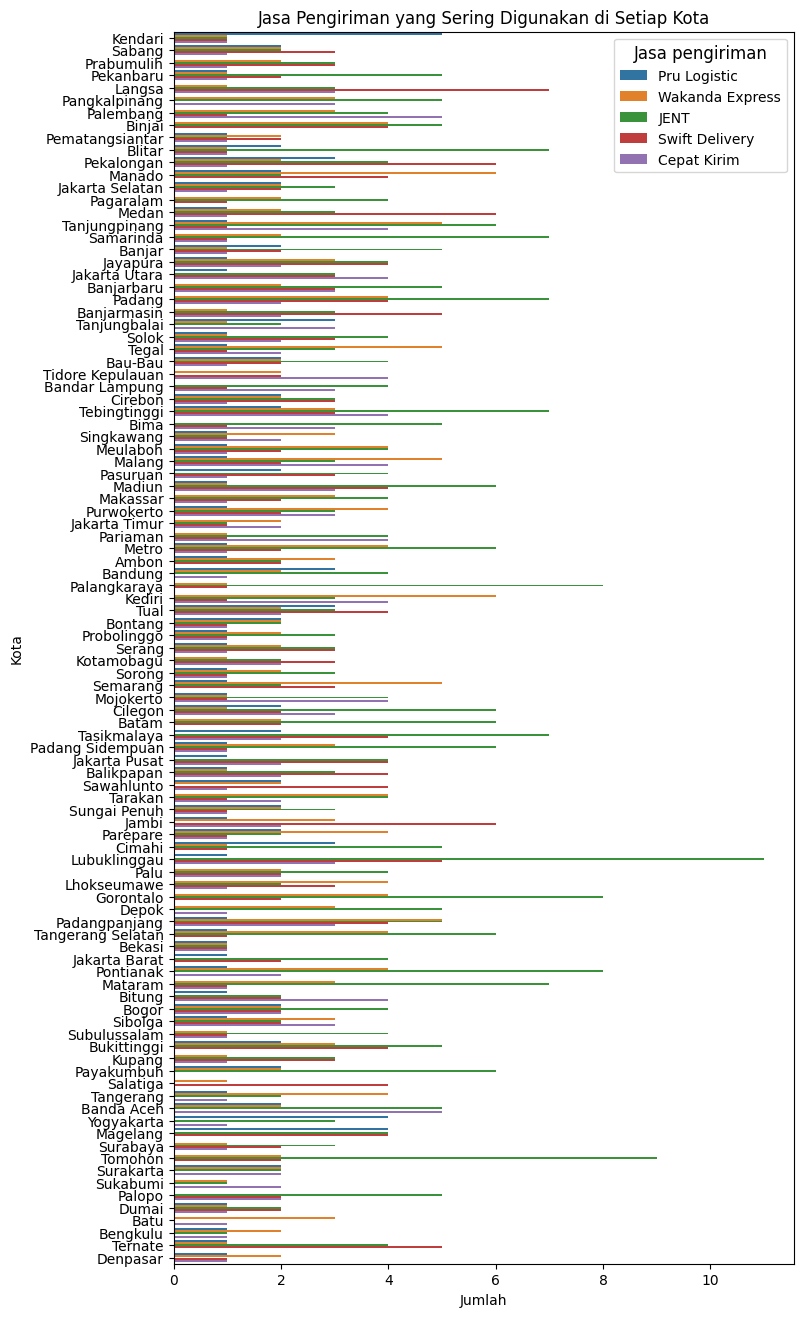

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat grafik dengan Seaborn
plt.figure(figsize=(8, 16))  # Mengatur ukuran gambar menjadi 16x8
sns.countplot(data=data, y='Kota', hue='Jasa Pengiriman')
plt.title('Jasa Pengiriman yang Sering Digunakan di Setiap Kota')
plt.ylabel('Kota')
plt.xlabel('Jumlah')
plt.xticks(rotation=0)
plt.legend(title='Jasa pengiriman', title_fontsize='12')
plt.show()


In [120]:
# Ambil daftar lokasi unik
locations = data['Kota'].unique()

# Fungsi untuk membuat dan menampilkan grafik berdasarkan lokasi yang dipilih
def show_chart(selected_location):
    data_location = data[data['Kota'] == selected_location]

    plt.figure(figsize=(8, 4))
    sns.countplot(data=data_location, x='Jasa Pengiriman')
    plt.title(f'Distribusi Metode Pengiriman di {selected_location}')
    plt.xlabel('Shipping Type')
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.show()

# Widget dropdown untuk memilih lokasi
location_dropdown = widgets.Dropdown(
    options=locations,
    description='Pilih Lokasi:'
)

# Interaksi untuk menampilkan grafik berdasarkan lokasi yang dipilih
interact(show_chart, selected_location=location_dropdown)


interactive(children=(Dropdown(description='Pilih Lokasi:', options=('Kendari', 'Sabang', 'Prabumulih', 'Pekan…

<function __main__.show_chart(selected_location)>

In [73]:
# Mengelompokkan pelanggan berdasarkan apakah mereka baru atau lama
pelanggan_baru = data[data['Customer Baru'] == 'Y']
pelanggan_lama = data[data['Customer Baru'] == 'N']

# Menghitung total pembelian untuk setiap kelompok
total_pembelian_baru = pelanggan_baru['Jumlah Pembelian'].sum()
total_pembelian_lama = pelanggan_lama['Jumlah Pembelian'].sum()

# Menampilkan perbandingan total pembelian
print("Total Pembelian Pelanggan Baru:", total_pembelian_baru)
print("Total Pembelian Pelanggan Lama:", total_pembelian_lama)


Total Pembelian Pelanggan Baru: 4853
Total Pembelian Pelanggan Lama: 1644


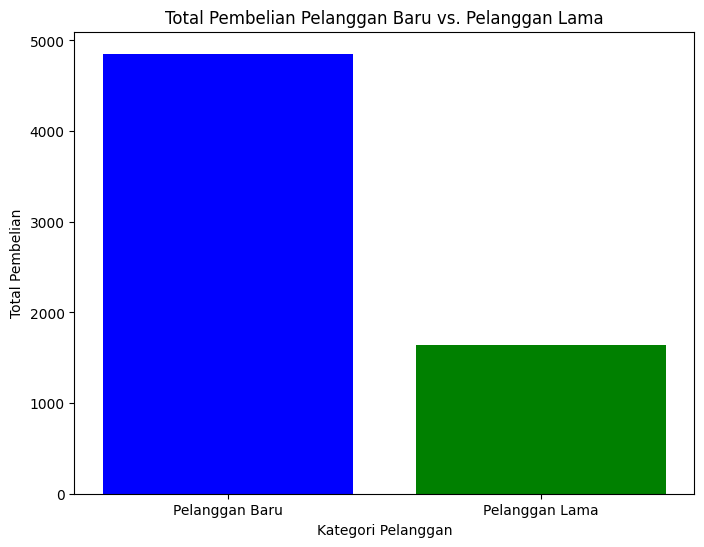

In [74]:
import matplotlib.pyplot as plt

# Data total pembelian
total_pembelian = [total_pembelian_baru, total_pembelian_lama]
kategori = ['Pelanggan Baru', 'Pelanggan Lama']

# Membuat grafik batang
plt.figure(figsize=(8, 6))
plt.bar(kategori, total_pembelian, color=['blue', 'green'])
plt.xlabel('Kategori Pelanggan')
plt.ylabel('Total Pembelian')
plt.title('Total Pembelian Pelanggan Baru vs. Pelanggan Lama')
plt.show()


In [75]:
# Menghitung total pendapatan untuk setiap kelompok
total_pendapatan_baru = pelanggan_baru['Total Harga'].sum()
total_pendapatan_lama = pelanggan_lama['Total Harga'].sum()

# Menampilkan perbandingan total pembelian
print("Total Pendapatan Pelanggan Baru:", total_pendapatan_baru)
print("Total Pendapatan Pelanggan Lama:", total_pendapatan_lama)

Total Pendapatan Pelanggan Baru: 97331750000.0
Total Pendapatan Pelanggan Lama: 32797500000.0


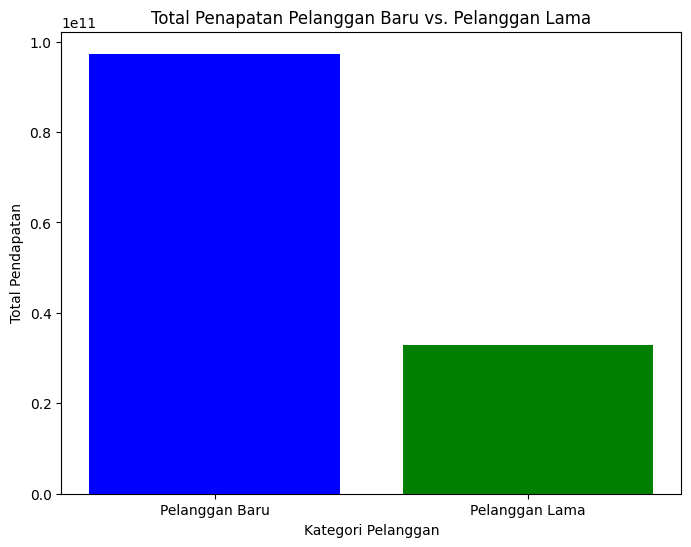

In [76]:
import matplotlib.pyplot as plt

# Data total pembelian
total_pendapatan = [total_pendapatan_baru, total_pendapatan_lama]
kategori = ['Pelanggan Baru', 'Pelanggan Lama']

# Membuat grafik batang
plt.figure(figsize=(8, 6))
plt.bar(kategori, total_pendapatan, color=['blue', 'green'])
plt.xlabel('Kategori Pelanggan')
plt.ylabel('Total Pendapatan')
plt.title('Total Penapatan Pelanggan Baru vs. Pelanggan Lama')
plt.show()


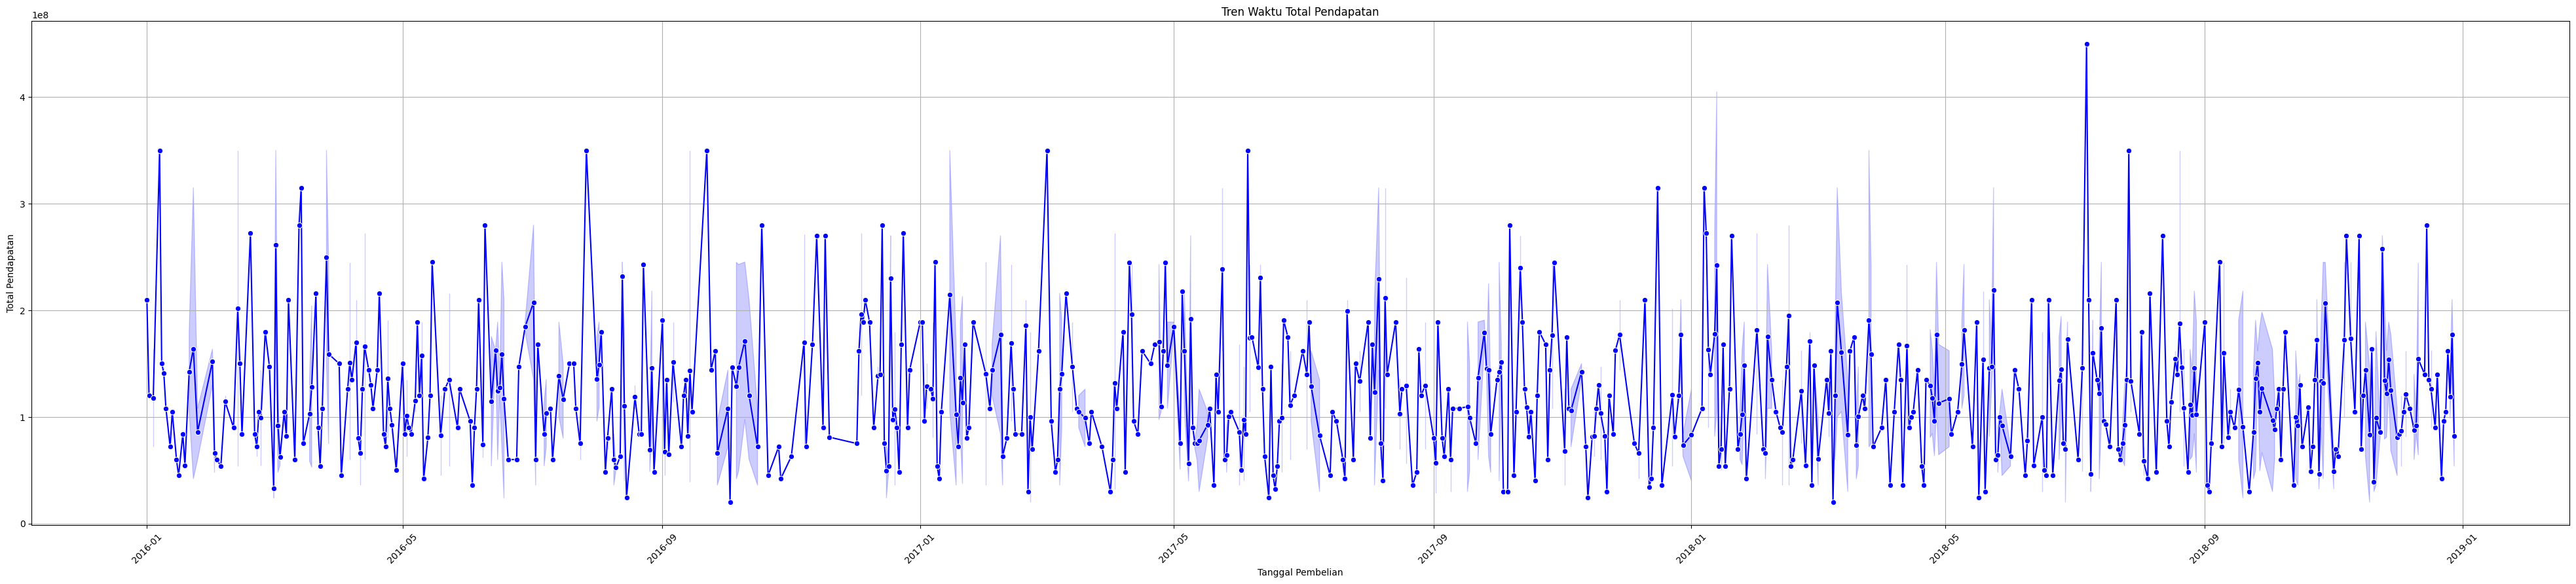

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data berdasarkan 'Tanggal Pembelian' dan 'Total harga', kemudian hitung frekuensi
total_pendapatan_per_tanggal = data.groupby(['Tanggal Pembelian', 'Total Harga'])['Total Harga'].count()
# Membuat grafik tren waktu dengan Seaborn
plt.figure(figsize=(50, 10))
sns.lineplot(data=total_pendapatan_per_tanggal, x='Tanggal Pembelian', y='Total Harga', marker='o', color='b')
plt.xlabel('Tanggal Pembelian')
plt.ylabel('Total Pendapatan')
plt.title('Tren Waktu Total Pendapatan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


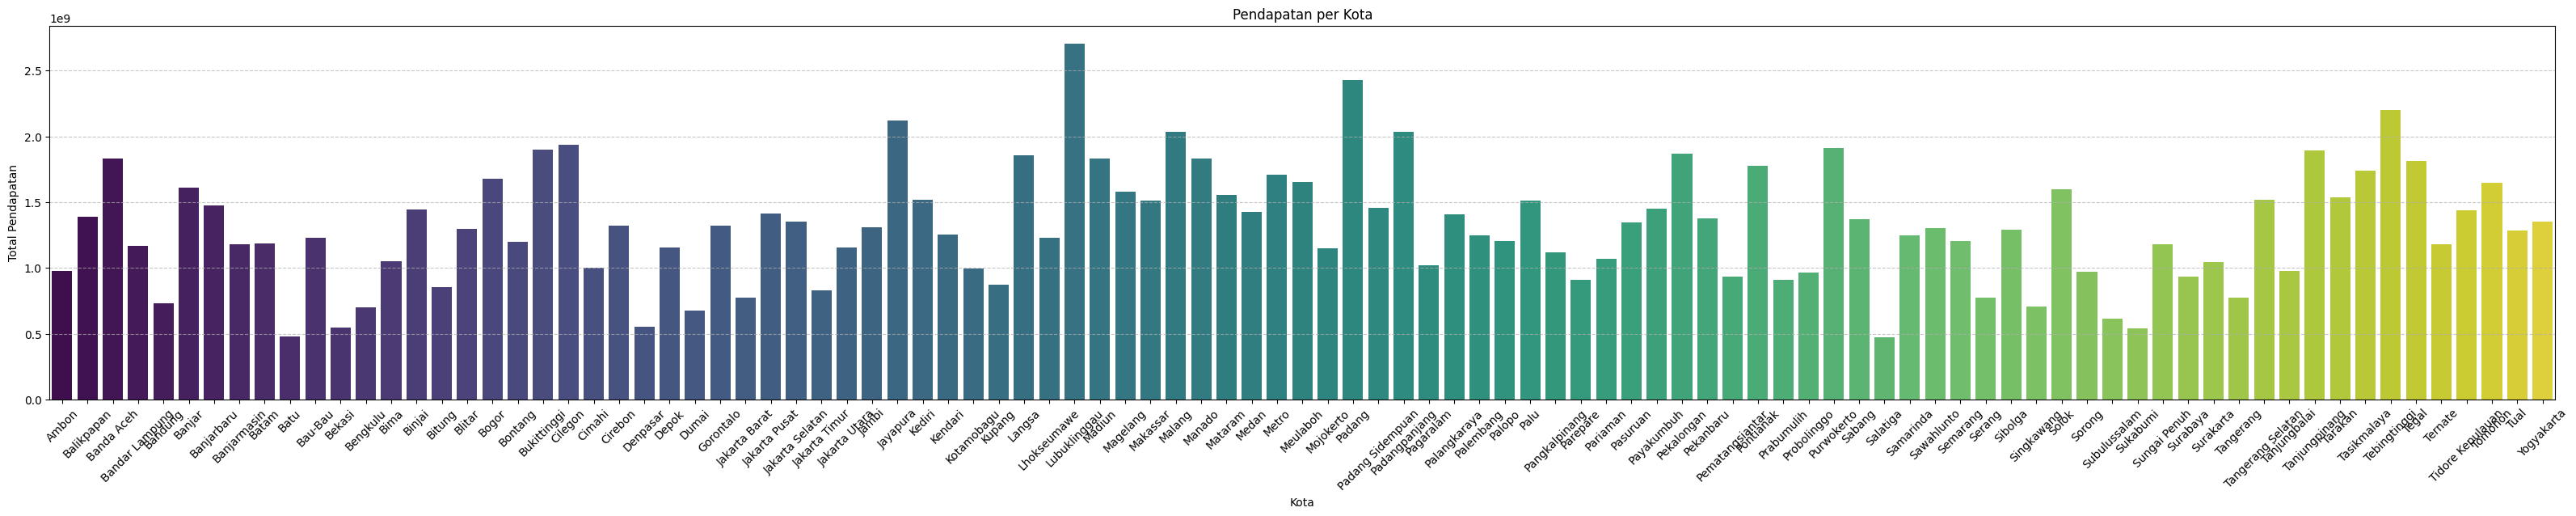

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data berdasarkan 'Kota' dan menghitung total pendapatan
pendapatan_per_kota = data.groupby('Kota')['Total Harga'].sum().reset_index()
# Membuat grafik bar pendapatan per kota dengan Seaborn
plt.figure(figsize=(40, 6))
sns.barplot(data=pendapatan_per_kota, x='Kota', y='Total Harga', palette='viridis')
plt.title('Pendapatan per Kota')
plt.xlabel('Kota')
plt.ylabel('Total Pendapatan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


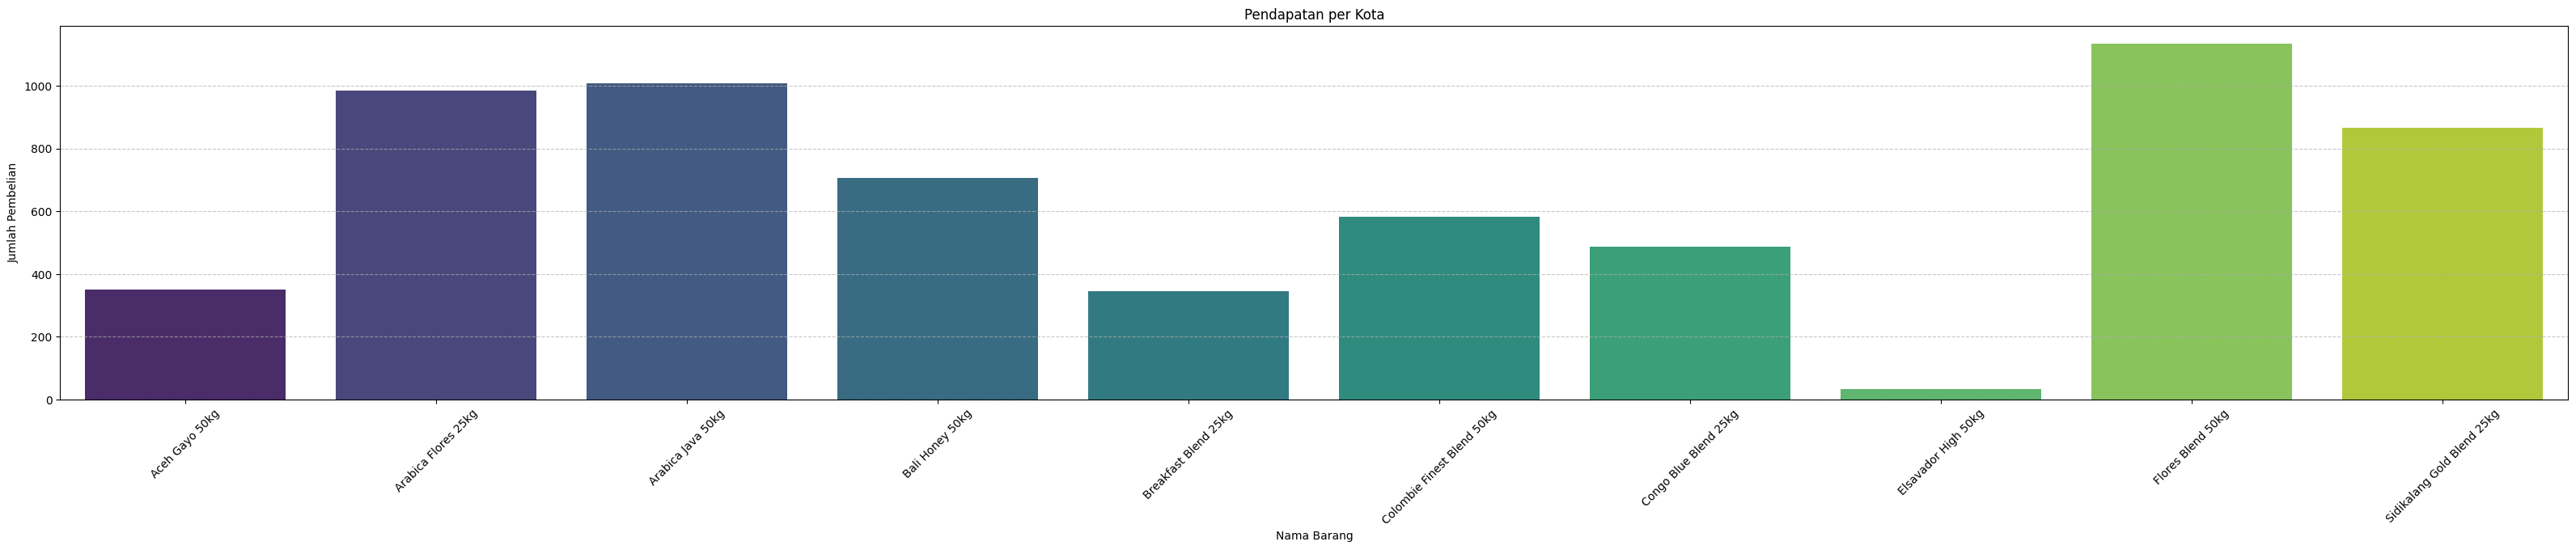

In [113]:
# Group data berdasarkan SKU (kode barang) dan jumlahkan jumlah pembelian
total_pembelian_per_barang = data.groupby('Nama Barang')['Jumlah Pembelian'].sum().reset_index()


plt.figure(figsize=(40, 6))
sns.barplot(data=total_pembelian_per_barang, x='Nama Barang', y='Jumlah Pembelian', palette='viridis')
plt.title('Pendapatan per Kota')
plt.xlabel('Nama Barang')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

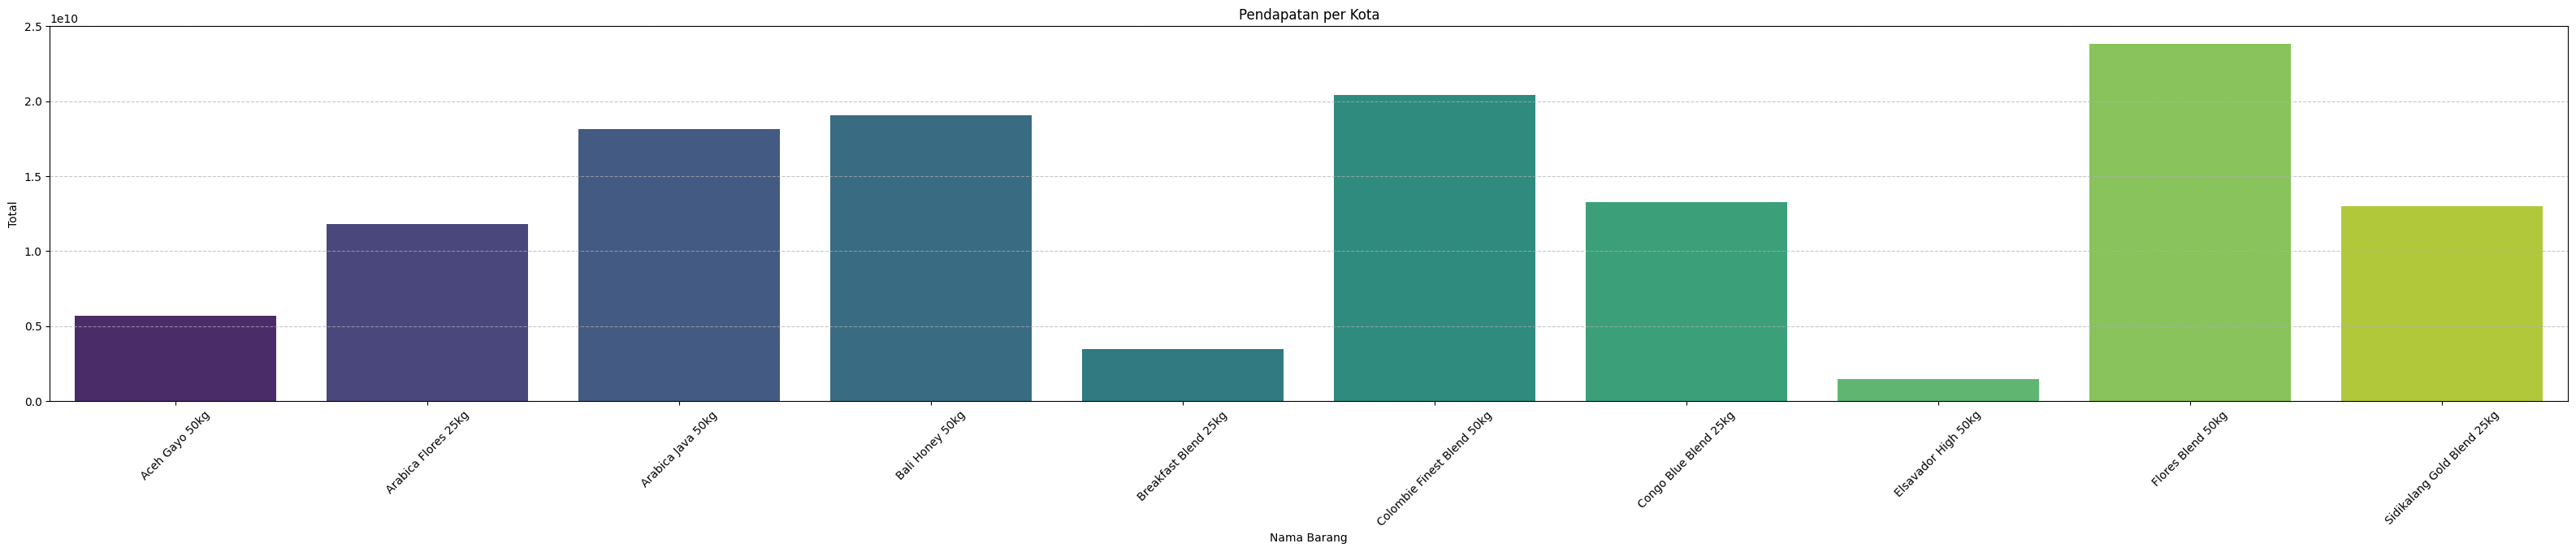

In [115]:
# Group data berdasarkan SKU (kode barang) dan jumlahkan jumlah pembelian
total_pembelian_per_total = data.groupby('Nama Barang')['Total Harga'].sum().reset_index()


plt.figure(figsize=(40, 6))
sns.barplot(data=total_pembelian_per_total, x='Nama Barang', y='Total Harga', palette='viridis')
plt.title('Pendapatan per Kota')
plt.xlabel('Nama Barang')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-91-6264b6f470cd>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=item_frequency_df, x='Kota', y='Jumlah Pembelian', hue='Nama Barang', ci=None)


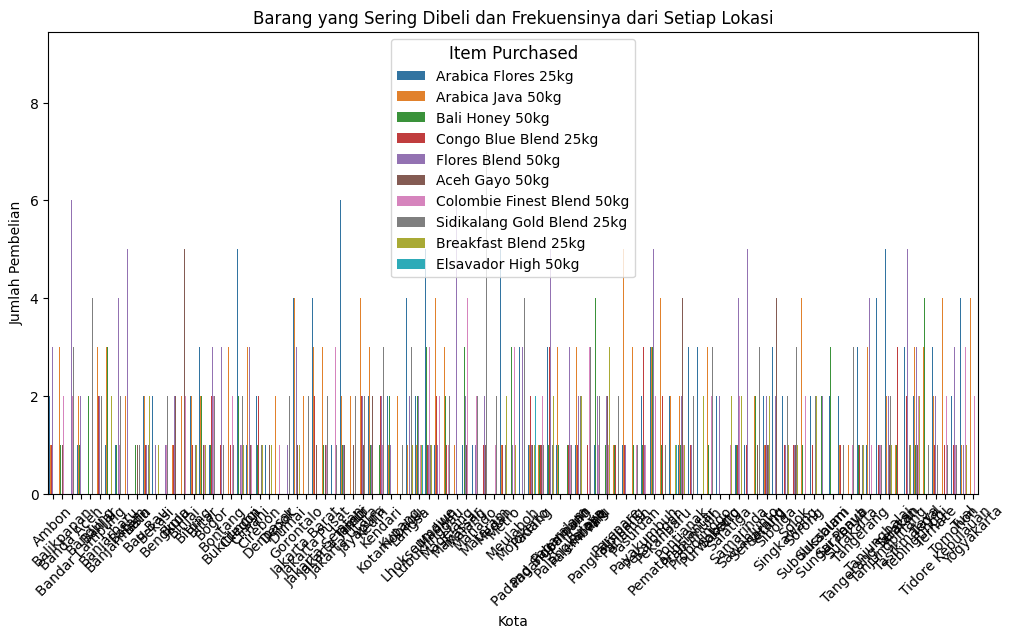

In [91]:
# Group data berdasarkan 'Location' dan 'Item Purchased', kemudian hitung frekuensi
item_frequency = data.groupby(['Kota', 'Nama Barang'])['Nama Barang'].count()

# Ubah hasil groupby menjadi DataFrame
item_frequency_df = item_frequency.reset_index(name='Jumlah Pembelian')

# Plot grafik batang dengan Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=item_frequency_df, x='Kota', y='Jumlah Pembelian', hue='Nama Barang', ci=None)
plt.title('Barang yang Sering Dibeli dan Frekuensinya dari Setiap Lokasi')
plt.xlabel('Kota')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.legend(title='Item Purchased', title_fontsize='12')
plt.show()

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
from IPython.display import display


# Group data berdasarkan 'Location' dan 'Item Purchased', kemudian hitung frekuensi
item_frequency = data.groupby(['Kota', 'Nama Barang'])['Nama Barang'].count()

# Ubah hasil groupby menjadi DataFrame
item_frequency_df = item_frequency.reset_index(name='Jumlah Pembelian')

# Ambil daftar lokasi unik
locations = item_frequency_df['Kota'].unique()

# Fungsi untuk membuat dan menampilkan grafik berdasarkan lokasi yang dipilih
def show_chart(selected_location):
    data_location = item_frequency_df[item_frequency_df['Kota'] == selected_location]

    plt.figure(figsize=(10, 6))
    sns.barplot(data=data_location, x='Nama Barang', y='Jumlah Pembelian')
    plt.title(f'Barang yang Sering Dibeli di {selected_location}')
    plt.xlabel('Nama Barang')
    plt.ylabel('Jumlah Pembelian')
    plt.xticks(rotation=45)
    plt.show()

# Widget dropdown untuk memilih lokasi
location_dropdown = widgets.Dropdown(
    options=locations,
    description='Pilih Lokasi:'
)

# Interaksi untuk menampilkan grafik berdasarkan lokasi yang dipilih
interact(show_chart, selected_location=location_dropdown)


interactive(children=(Dropdown(description='Pilih Lokasi:', options=('Ambon', 'Balikpapan', 'Banda Aceh', 'Ban…

<function __main__.show_chart(selected_location)>